In [3]:
import pandas as pd # Data analysis and manipulation 
import numpy as np # Numerical operations
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics


In [4]:
data = pd.read_csv('data.csv')
data.head()

,Packet Length Variance,Packet Length Std,Max Packet Length,Fwd Packets/s,Fwd IAT Max,Flow IAT Max,Init_Win_bytes_forward,Fwd Packet Length Mean,Fwd IAT Std,Fwd IAT Mean,...,Packet Length Mean,Min Packet Length,Flow IAT Mean,Flow Duration,Average Packet Size,Fwd Packet Length Std,Fwd Packet Length Min,Fwd Packet Length Max,Fwd IAT Total,Label
0,0.0,0.0,6,666666.666700,3,3,33,6.0,0.0,3.0,...,6.0,6,3.0,3,9.0,0.0,6,6,3,0
1,0.0,0.0,6,9174.311927,0,109,29,6.0,0.0,0.0,...,6.0,6,109.0,109,9.0,0.0,6,6,0,0
2,0.0,0.0,6,19230.769230,0,52,29,6.0,0.0,0.0,...,6.0,6,52.0,52,9.0,0.0,6,6,0,0
3,0.0,0.0,6,29411.764710,0,34,31,6.0,0.0,0.0,...,6.0,6,34.0,34,9.0,0.0,6,6,0,0
4,0.0,0.0,6,666666.666700,3,3,32,6.0,0.0,3.0,...,6.0,6,3.0,3,9.0,0.0,6,6,3,0


In [3]:
#names of columns
data.columns

Index([' Packet Length Variance', ' Packet Length Std', ' Max Packet Length',
       'Fwd Packets/s', ' Fwd IAT Max', ' Flow IAT Max',
       'Init_Win_bytes_forward', ' Fwd Packet Length Mean', ' Fwd IAT Std',
       ' Fwd IAT Mean', ' Flow IAT Std', ' Packet Length Mean',
       ' Min Packet Length', ' Flow IAT Mean', ' Flow Duration',
       ' Average Packet Size', ' Fwd Packet Length Std',
       ' Fwd Packet Length Min', ' Fwd Packet Length Max', 'Fwd IAT Total',
       'Label'],
      dtype='object')

In [4]:
data.shape

(1047115, 21)

In [5]:
# data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047115 entries, 0 to 1047114
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0    Packet Length Variance  1047115 non-null  float64
 1    Packet Length Std       1047115 non-null  float64
 2    Max Packet Length       1047115 non-null  int64  
 3   Fwd Packets/s            1047115 non-null  float64
 4    Fwd IAT Max             1047115 non-null  int64  
 5    Flow IAT Max            1047115 non-null  int64  
 6   Init_Win_bytes_forward   1047115 non-null  int64  
 7    Fwd Packet Length Mean  1047115 non-null  float64
 8    Fwd IAT Std             1047115 non-null  float64
 9    Fwd IAT Mean            1047115 non-null  float64
 10   Flow IAT Std            1047115 non-null  float64
 11   Packet Length Mean      1047115 non-null  float64
 12   Min Packet Length       1047115 non-null  int64  
 13   Flow IAT Mean           1047115 non-null 

In [6]:
# statistical summary of data 

data.describe()

,Packet Length Variance,Packet Length Std,Max Packet Length,Fwd Packets/s,Fwd IAT Max,Flow IAT Max,Init_Win_bytes_forward,Fwd Packet Length Mean,Fwd IAT Std,Fwd IAT Mean,...,Packet Length Mean,Min Packet Length,Flow IAT Mean,Flow Duration,Average Packet Size,Fwd Packet Length Std,Fwd Packet Length Min,Fwd Packet Length Max,Fwd IAT Total,Label
count,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06,...,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06,1.047115e+06
mean,1.185884e+06,5.930902e+02,1.879177e+03,7.647814e+04,1.833230e+07,1.852932e+07,6.802901e+03,7.529893e+01,7.081652e+06,4.342642e+06,...,3.052839e+02,1.241238e+01,2.238605e+06,2.302225e+07,3.371836e+02,1.018786e+02,1.758950e+01,2.800677e+02,2.262630e+07,3.626507e-01
std,2.533196e+06,9.133461e+02,2.894791e+03,2.824151e+05,3.461548e+07,3.444148e+07,1.481994e+04,2.517950e+02,1.418237e+07,1.080381e+07,...,4.176279e+02,2.240324e+01,5.598925e+06,3.931618e+07,4.578466e+02,3.930295e+02,8.643424e+01,9.461808e+02,3.933784e+07,4.807654e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,6.000000e+00,3.041458e-01,3.000000e+00,2.350000e+02,0.000000e+00,6.000000e+00,0.000000e+00,3.000000e+00,...,6.000000e+00,0.000000e+00,1.420000e+02,2.570000e+02,9.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,3.000000e+00,0.000000e+00
50%,1.732800e+03,4.162691e+01,1.220000e+02,2.075493e+01,5.701000e+03,8.767200e+04,2.510000e+02,3.500000e+01,3.248021e+02,3.009500e+03,...,7.040000e+01,0.000000e+00,3.270367e+04,1.230480e+05,8.925000e+01,0.000000e+00,0.000000e+00,3.900000e+01,6.014000e+03,0.000000e+00
75%,1.227234e+06,1.107806e+03,3.789000e+03,7.662835e+03,1.002960e+07,1.000132e+07,8.192000e+03,5.466667e+01,3.862786e+06,2.907496e+06,...,7.018824e+02,2.900000e+01,2.137104e+06,1.633167e+07,7.439375e+02,1.190798e+02,3.000000e+01,3.280000e+02,1.329436e+07,1.000000e+00
max,2.240000e+07,4.731522e+03,2.482000e+04,3.000000e+06,1.200000e+08,1.200000e+08,6.553500e+04,4.640758e+03,8.460293e+07,1.200000e+08,...,2.456000e+03,1.359000e+03,1.200000e+08,1.200000e+08,3.684000e+03,7.125597e+03,2.293000e+03,2.482000e+04,1.200000e+08,1.000000e+00


In [6]:
data.Label.value_counts()

0    667378
1    379737
Name: Label, dtype: int64

In [ ]:
#Univariate Analysis(pdf, cdf, boxplot and violin plot)

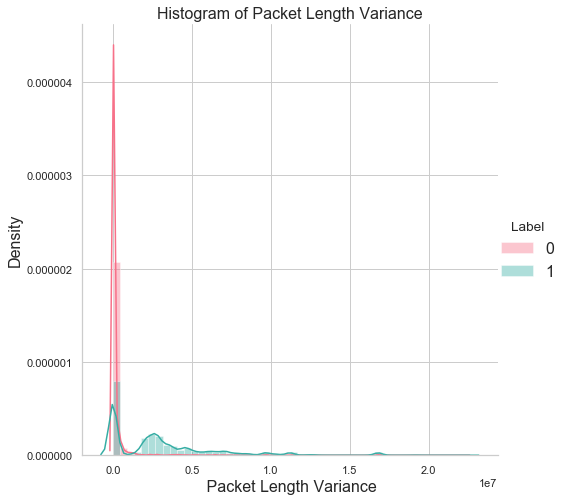

In [53]:
# Here, we are using  Packet Length Variance feature to generate pdf()
# pdf(smoothed form of histogram)
# pdf basically shows, how many of points lies in some interval
#Distribution plot
rc1={'axes.labelsize': 16, 'font.size': 16, 'legend.fontsize': 16.0, 'axes.titlesize': 16}
plt.rcParams.update(**rc1)
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Packet Length Variance").add_legend()
plt.title("Histogram of Packet Length Variance")
plt.ylabel("Density")
plt.show()

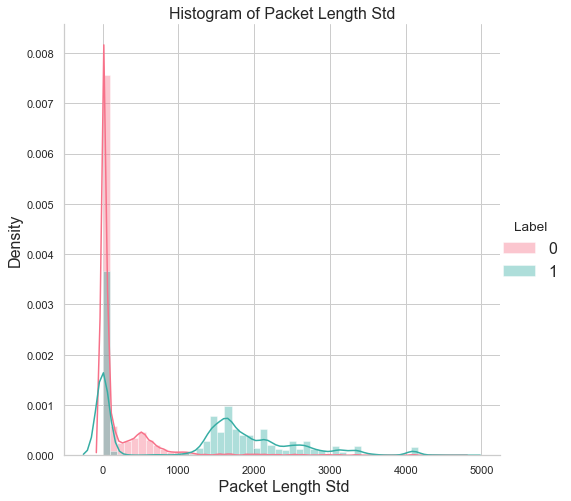

In [54]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Packet Length Std").add_legend()
plt.title("Histogram of Packet Length Std")
plt.ylabel("Density")
plt.show()

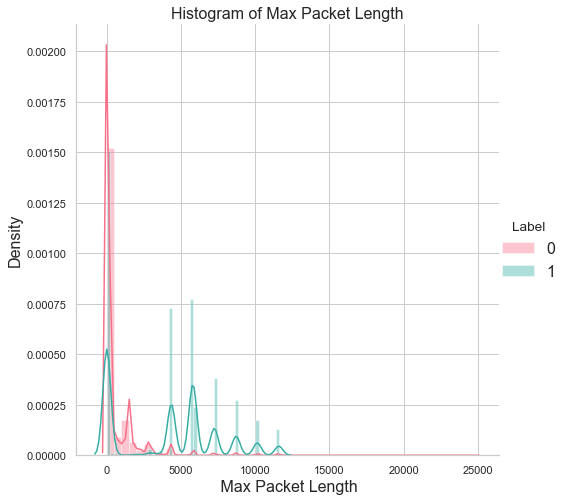

In [55]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Max Packet Length").add_legend()
plt.title("Histogram of Max Packet Length")
plt.ylabel("Density")
plt.show()

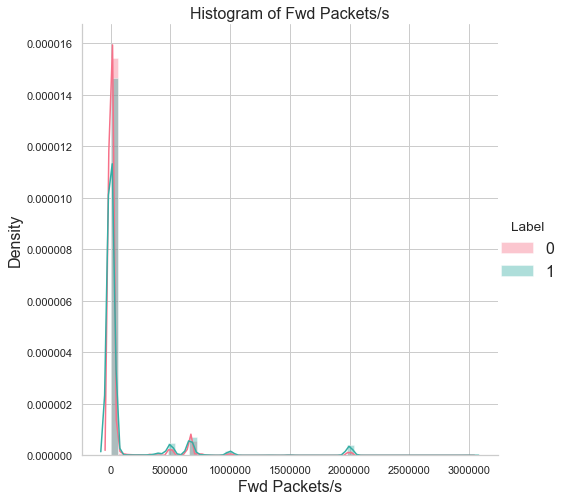

In [56]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, "Fwd Packets/s").add_legend()
plt.title("Histogram of Fwd Packets/s")
plt.ylabel("Density")
plt.show()

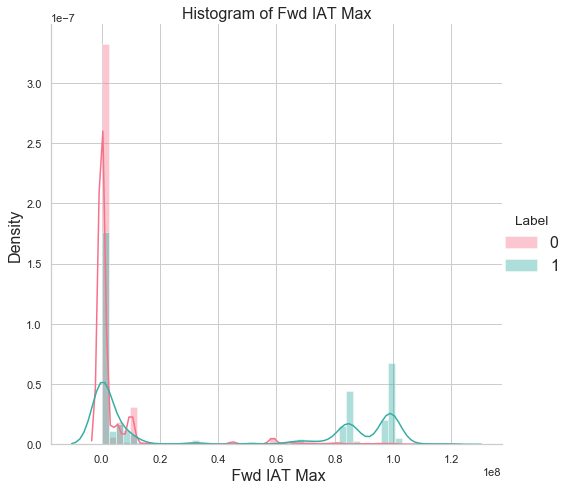

In [58]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Fwd IAT Max").add_legend()
plt.title("Histogram of Fwd IAT Max")
plt.ylabel("Density")
plt.show()

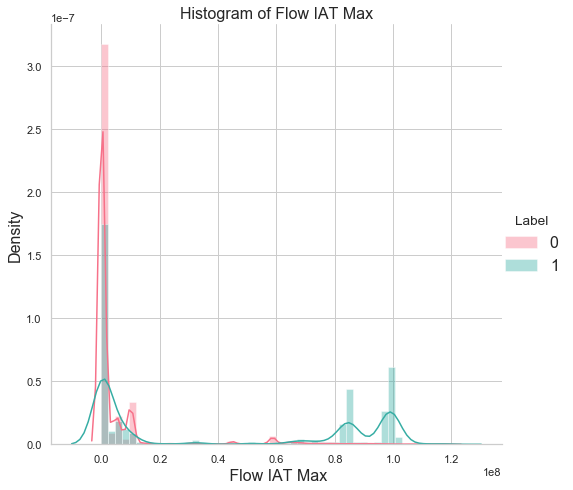

In [59]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Flow IAT Max").add_legend()
plt.title("Histogram of Flow IAT Max")
plt.ylabel("Density")
plt.show()

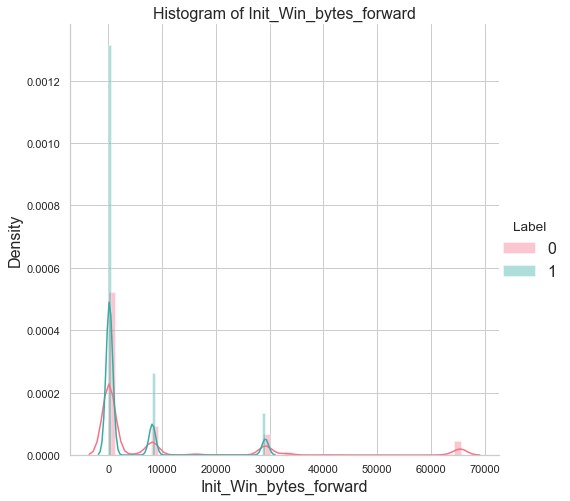

In [61]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, "Init_Win_bytes_forward").add_legend()
plt.title("Histogram of Init_Win_bytes_forward")
plt.ylabel("Density")
plt.show()

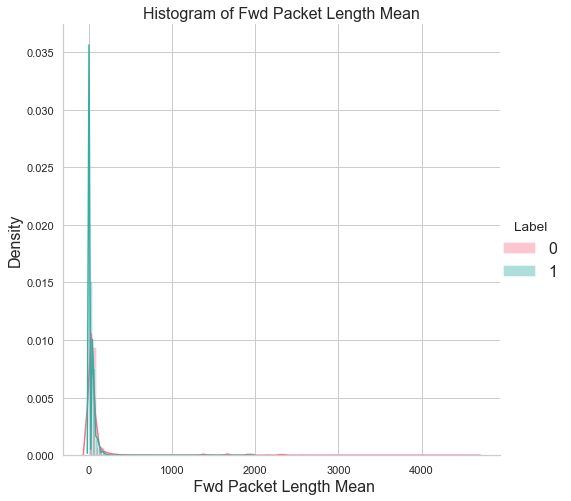

In [62]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Fwd Packet Length Mean").add_legend()
plt.title("Histogram of Fwd Packet Length Mean")
plt.ylabel("Density")
plt.show()

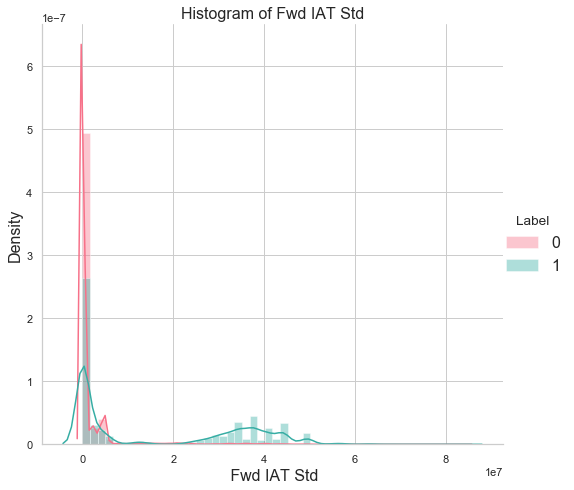

In [63]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Fwd IAT Std").add_legend()
plt.title("Histogram of Fwd IAT Std")
plt.ylabel("Density")
plt.show()

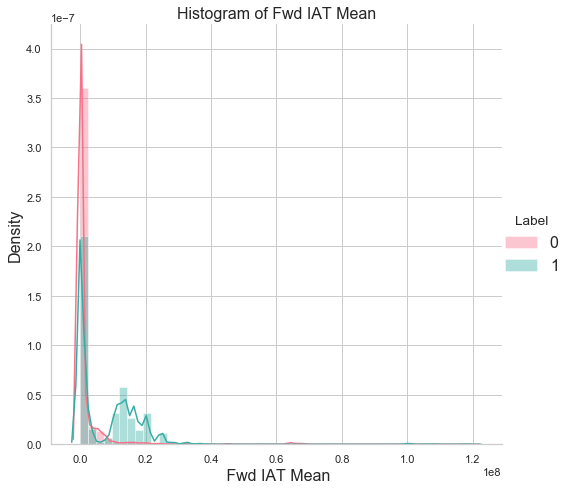

In [67]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Fwd IAT Mean").add_legend()
plt.title("Histogram of Fwd IAT Mean")
plt.ylabel("Density")
plt.show()

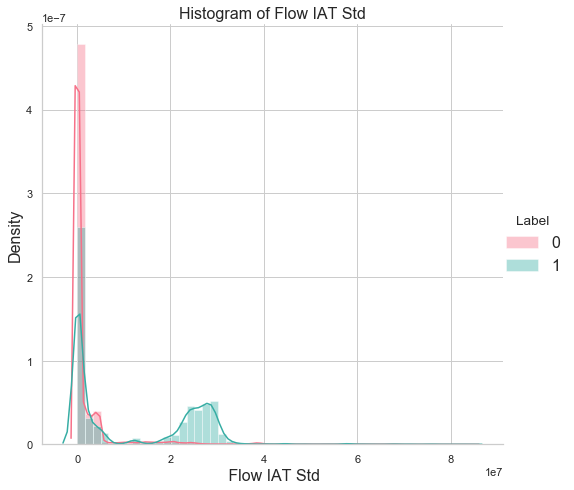

In [64]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Flow IAT Std").add_legend()
plt.title("Histogram of Flow IAT Std")
plt.ylabel("Density")
plt.show()

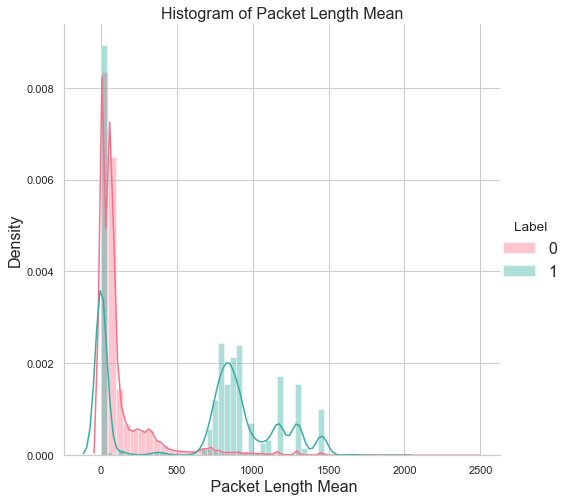

In [65]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Packet Length Mean").add_legend()
plt.title("Histogram of Packet Length Mean")
plt.ylabel("Density")
plt.show()

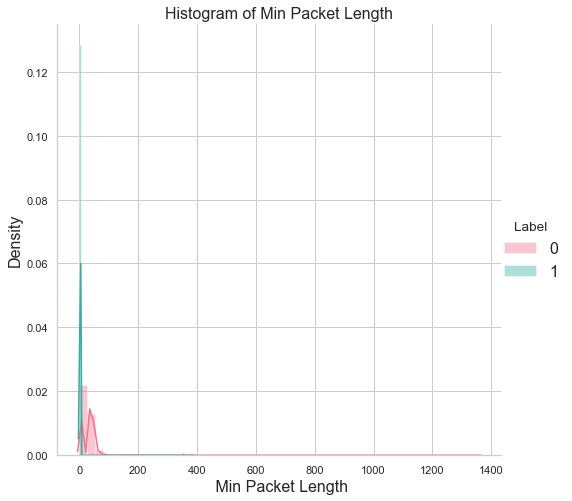

In [66]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Min Packet Length").add_legend()
plt.title("Histogram of Min Packet Length")
plt.ylabel("Density")
plt.show()

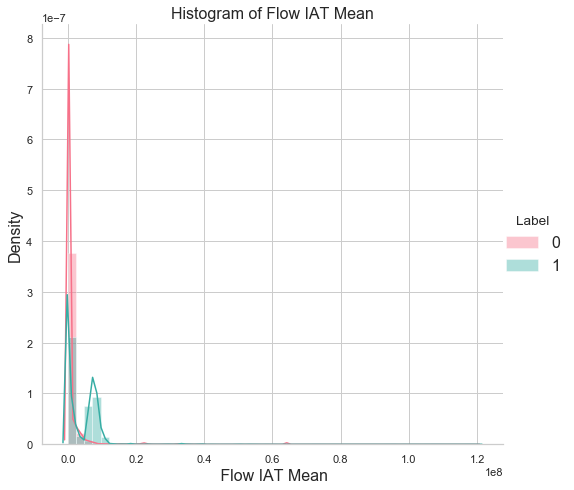

In [68]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Flow IAT Mean").add_legend()
plt.title("Histogram of Flow IAT Mean")
plt.ylabel("Density")
plt.show()

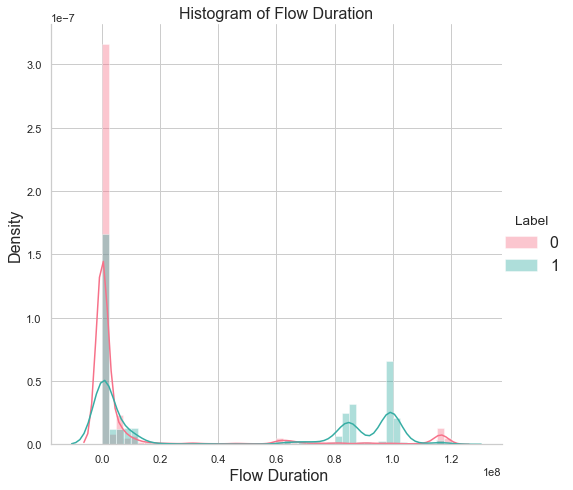

In [69]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Flow Duration").add_legend()
plt.title("Histogram of Flow Duration")
plt.ylabel("Density")
plt.show()

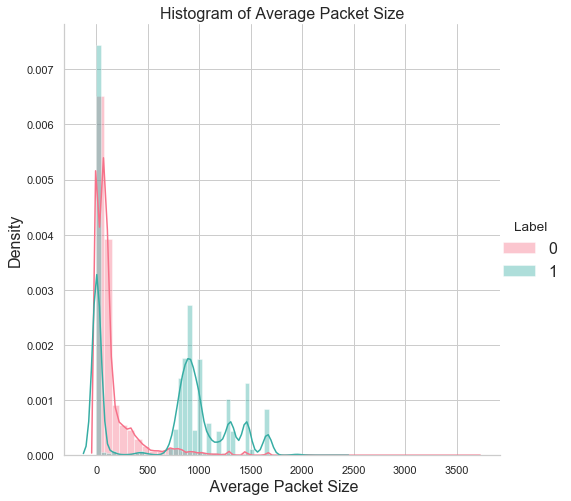

In [72]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Average Packet Size").add_legend()
plt.title("Histogram of Average Packet Size")
plt.ylabel("Density")
plt.show()

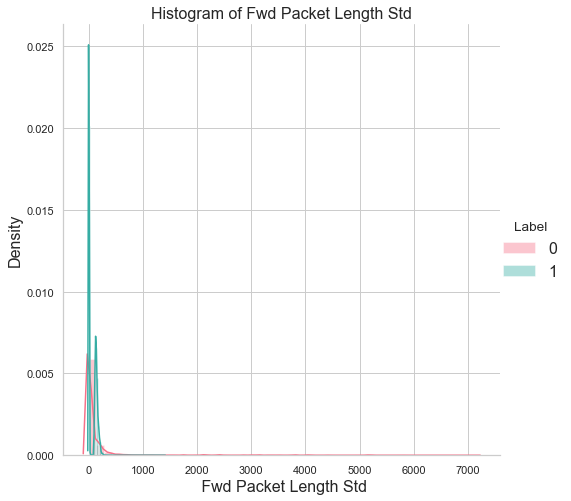

In [73]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Fwd Packet Length Std").add_legend()
plt.title("Histogram of Fwd Packet Length Std")
plt.ylabel("Density")
plt.show()

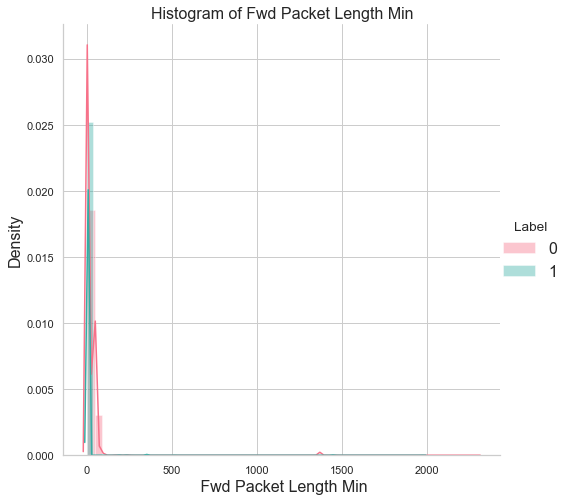

In [74]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Fwd Packet Length Min").add_legend()
plt.title("Histogram of Fwd Packet Length Min")
plt.ylabel("Density")
plt.show()

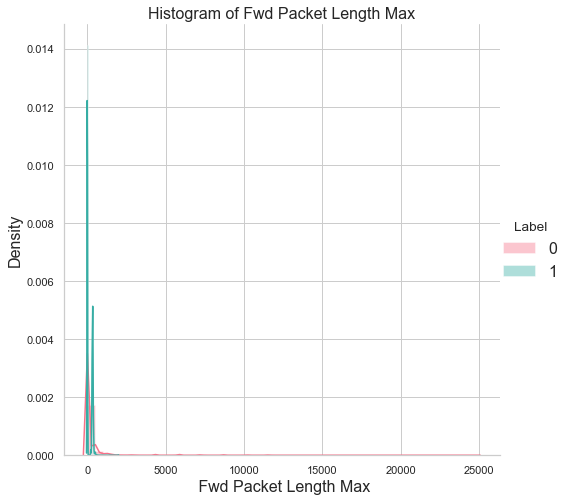

In [75]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, " Fwd Packet Length Max").add_legend()
plt.title("Histogram of Fwd Packet Length Max")
plt.ylabel("Density")
plt.show()

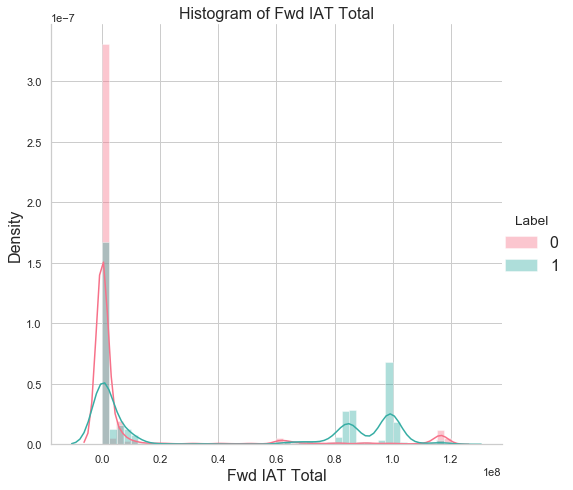

In [76]:
sns.set(rc=rc1)
sns.set_style("whitegrid")
sns.FacetGrid(data,height=5, hue = "Label",palette="husl", size = 7).map(sns.distplot, "Fwd IAT Total").add_legend()
plt.title("Histogram of Fwd IAT Total")
plt.ylabel("Density")
plt.show()

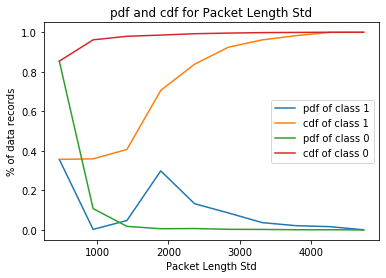

In [11]:
# Cumulative sum of area under curve upto gives you cdf
# Here, Class 1 means attack
# Class 0 means benign
one = data.loc[data["Label"] == 1]
two = data.loc[data["Label"] == 0]
label = ["pdf of class 1", "cdf of class 1", "pdf of class 0", "cdf of class 0"]
counts, bin_edges = np.histogram(one[" Packet Length Std"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for Packet Length Std")
plt.xlabel("Packet Length Std")
plt.ylabel("% of data records")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two[" Packet Length Std"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

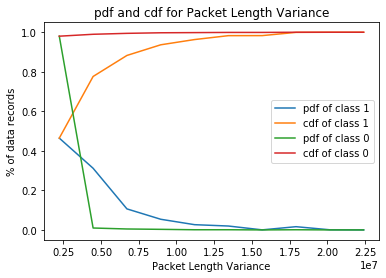

In [12]:
one = data.loc[data["Label"] == 1]
two = data.loc[data["Label"] == 0]
label = ["pdf of class 1", "cdf of class 1", "pdf of class 0", "cdf of class 0"]
counts, bin_edges = np.histogram(one[" Packet Length Variance"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for Packet Length Variance")
plt.xlabel("Packet Length Variance")
plt.ylabel("% of data records")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two[" Packet Length Variance"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

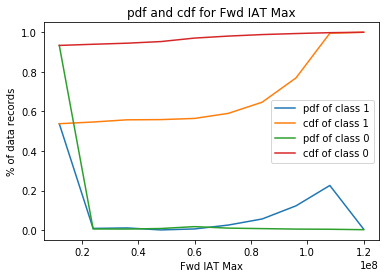

In [13]:
# Cumulative sum of area under curve upto gives you cdf
# Here, Class 1 means attack
# Class 0 means benign
one = data.loc[data["Label"] == 1]
two = data.loc[data["Label"] == 0]
label = ["pdf of class 1", "cdf of class 1", "pdf of class 0", "cdf of class 0"]
counts, bin_edges = np.histogram(one[" Fwd IAT Max"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for Fwd IAT Max")
plt.xlabel("Fwd IAT Max")
plt.ylabel("% of data records")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two[" Fwd IAT Max"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

In [ ]:
#Bivariate analysis--> of two variables to find an empirical relationship between them

E:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


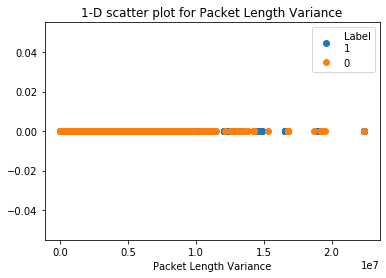

In [14]:
# 1-d scatter plot
one = data.loc[data["Label"] == 1]
two = data.loc[data["Label"] == 0]
plt.plot(one[" Packet Length Variance"], np.zeros_like(one[" Packet Length Variance"]), 'o', label = "Label\n" "1")
plt.plot(two[" Packet Length Variance"], np.zeros_like(two[" Packet Length Variance"]), 'o', label = "0")
plt.title("1-D scatter plot for Packet Length Variance")
plt.xlabel("Packet Length Variance")
plt.legend()
plt.show()

E:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


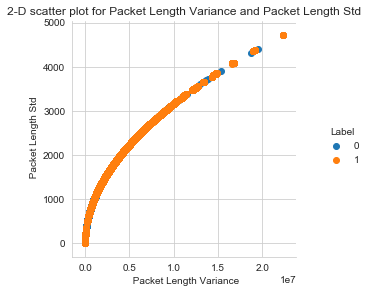

In [16]:
# 2d scatter plot with color coding for each class

sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "Label", size = 4).map(plt.scatter, " Packet Length Variance", " Packet Length Std").add_legend()
plt.title("2-D scatter plot for Packet Length Variance and Packet Length Std")
plt.show()

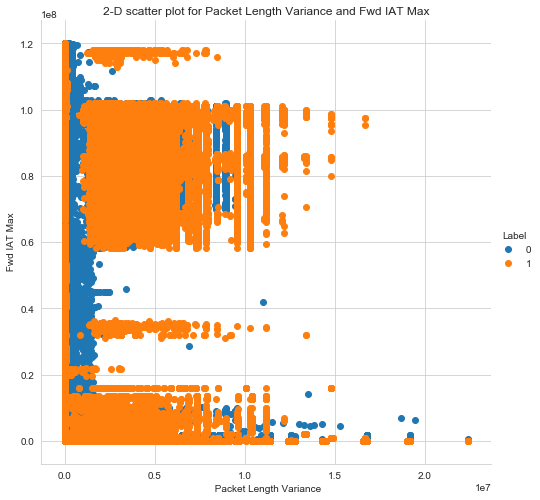

In [19]:
# 2d scatter plot with color coding for each class

sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "Label", size = 7).map(plt.scatter, " Packet Length Variance", " Fwd IAT Max",fontsize = 16).add_legend()
plt.title("2-D scatter plot for Packet Length Variance and Fwd IAT Max")
plt.show()

In [ ]:
##################Multivariate data analysis########################

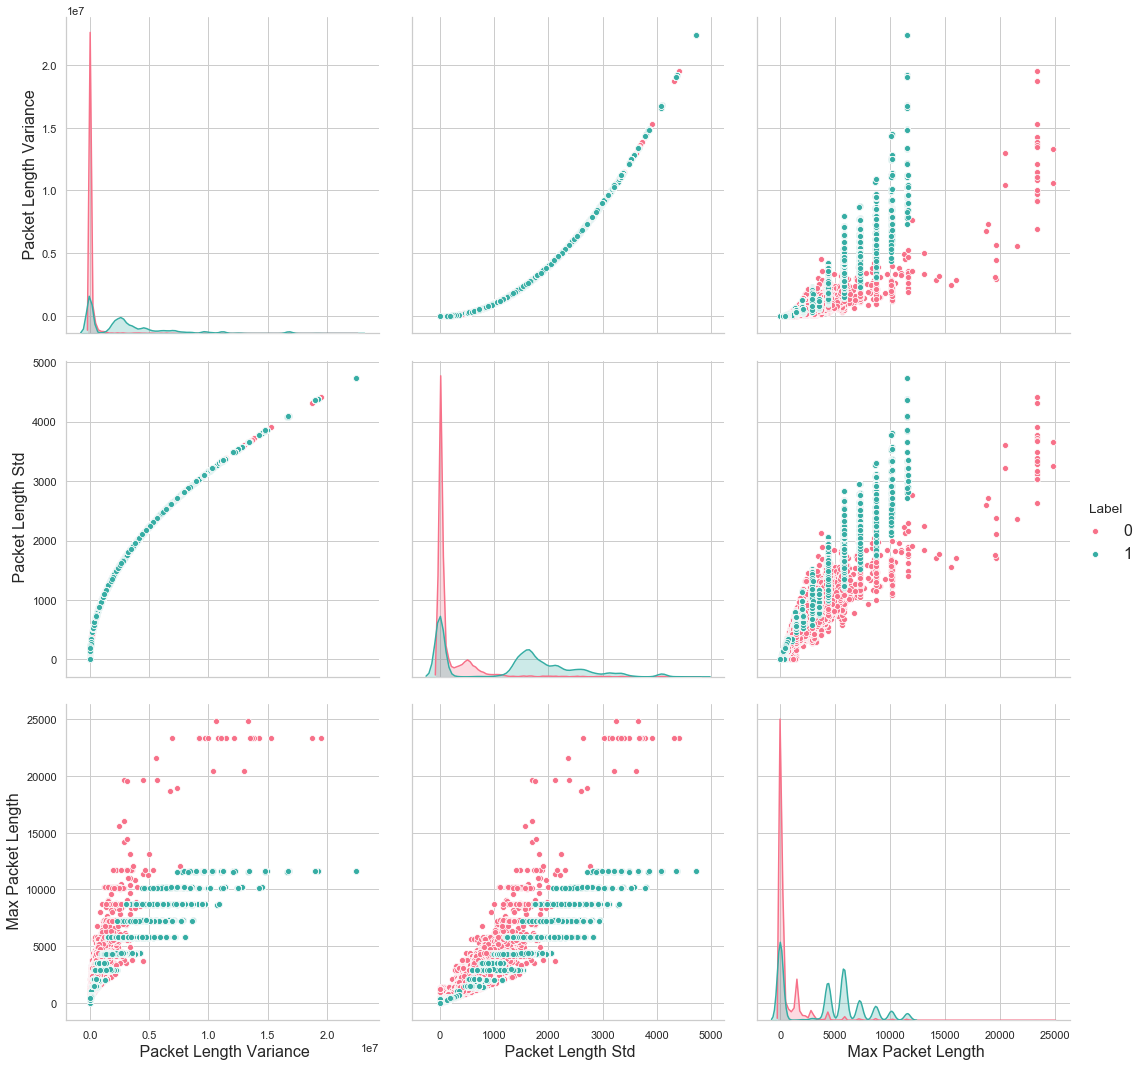

In [35]:
#Here, we are generating pairplot based on Label
#We use pair plot where the dimenstionality of data is less.
#In our case we have only 20 dimension data. So, we use only 3 features here
rc={'axes.labelsize': 16, 'font.size': 16, 'legend.fontsize': 16.0, 'axes.titlesize': 16}
plt.rcParams.update(**rc)
sns.set_style("whitegrid")
sns.pairplot(data, height=3, hue = "Label", palette="husl", vars = [' Packet Length Variance', ' Packet Length Std', ' Max Packet Length'], size = 5)
plt.show()

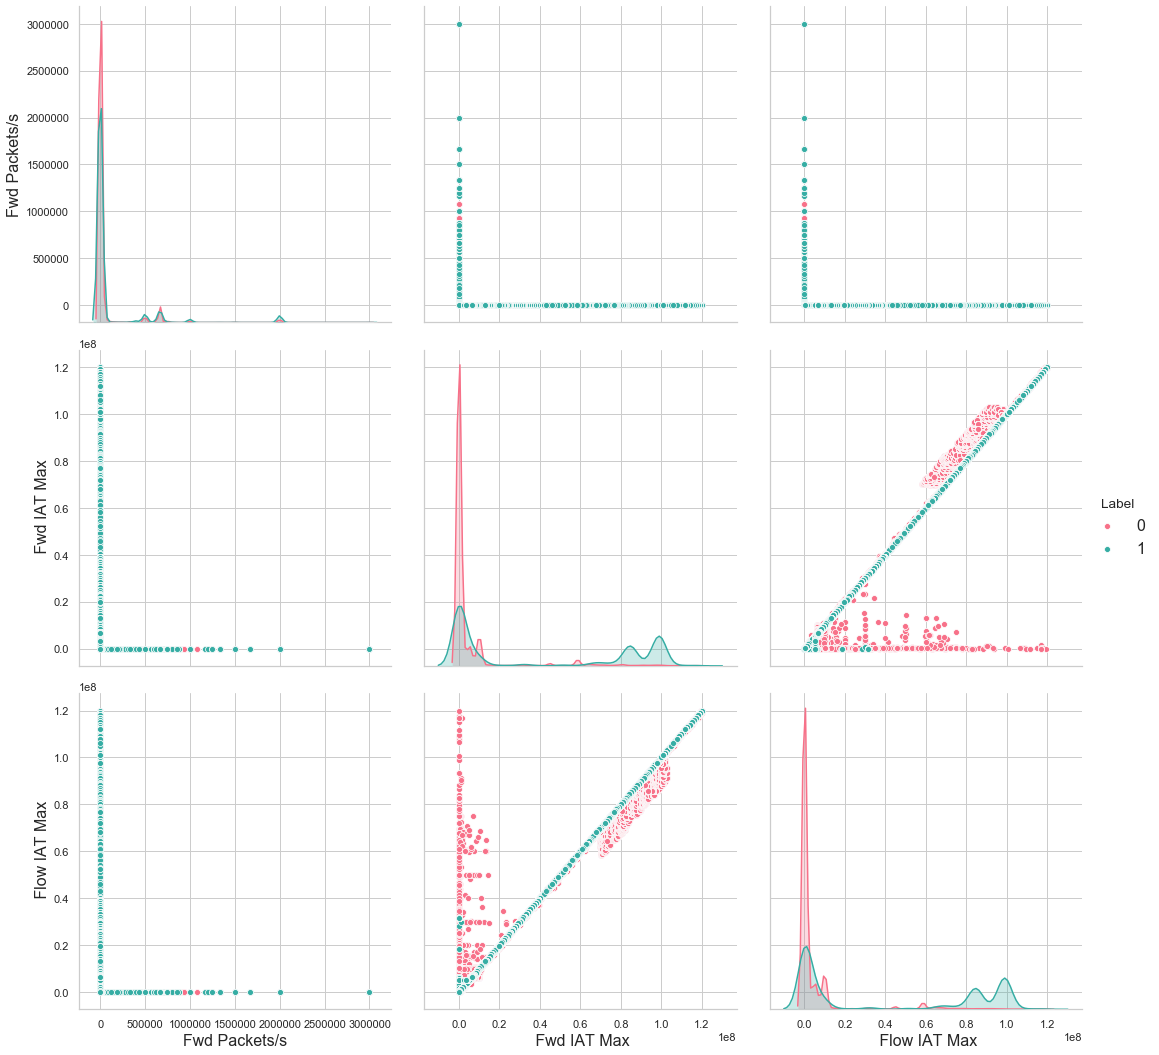

In [36]:
sns.set(rc=rc)
sns.set_style("whitegrid")
sns.pairplot(data, height=3, hue = "Label", palette="husl", vars = ['Fwd Packets/s', ' Fwd IAT Max', ' Flow IAT Max'], size = 5)
plt.show()

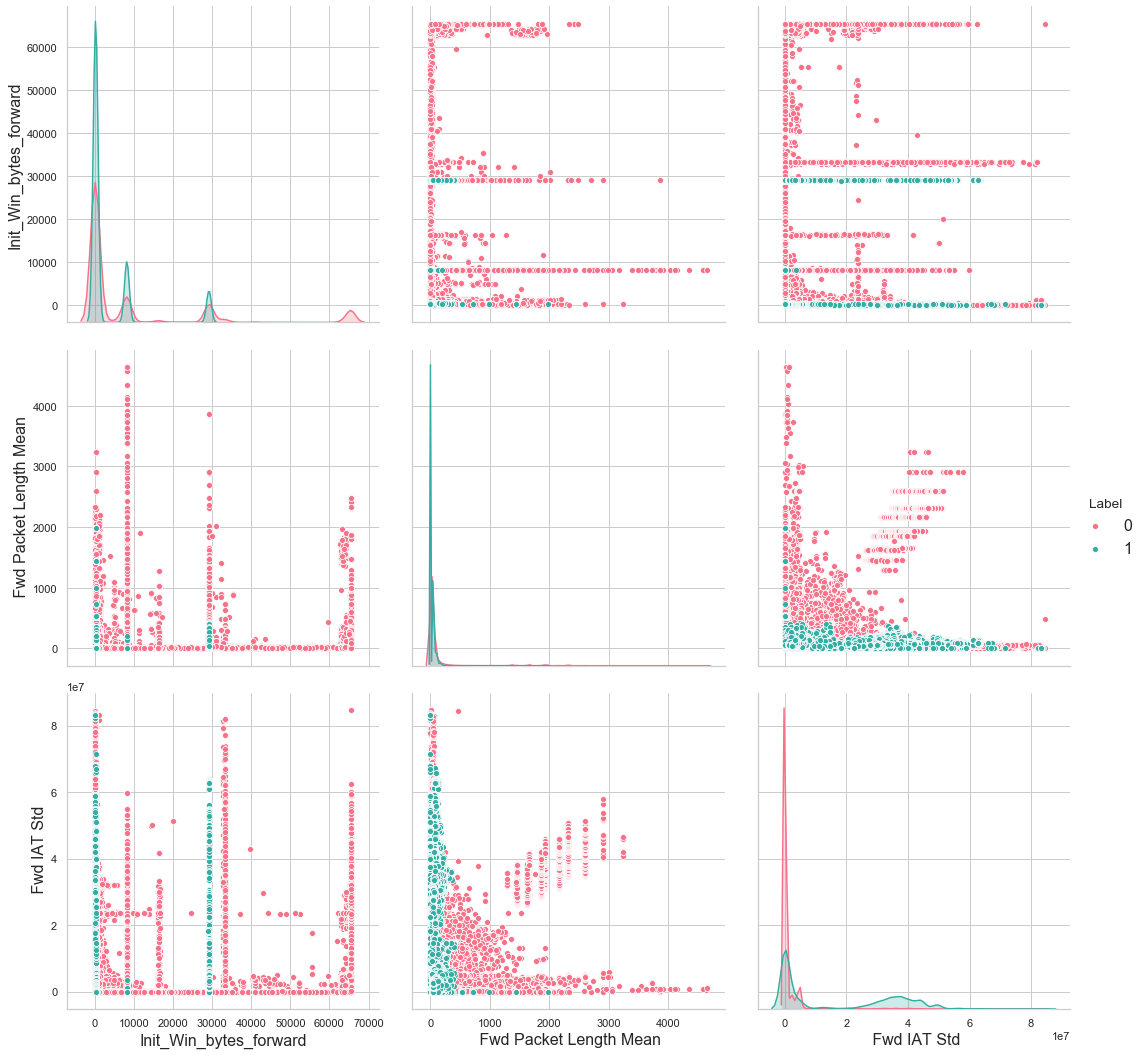

In [37]:
sns.set(rc=rc)
sns.set_style("whitegrid")
sns.pairplot(data, height=3, hue = "Label", palette="husl", vars = ['Init_Win_bytes_forward', ' Fwd Packet Length Mean', ' Fwd IAT Std'], size = 5)
plt.show()

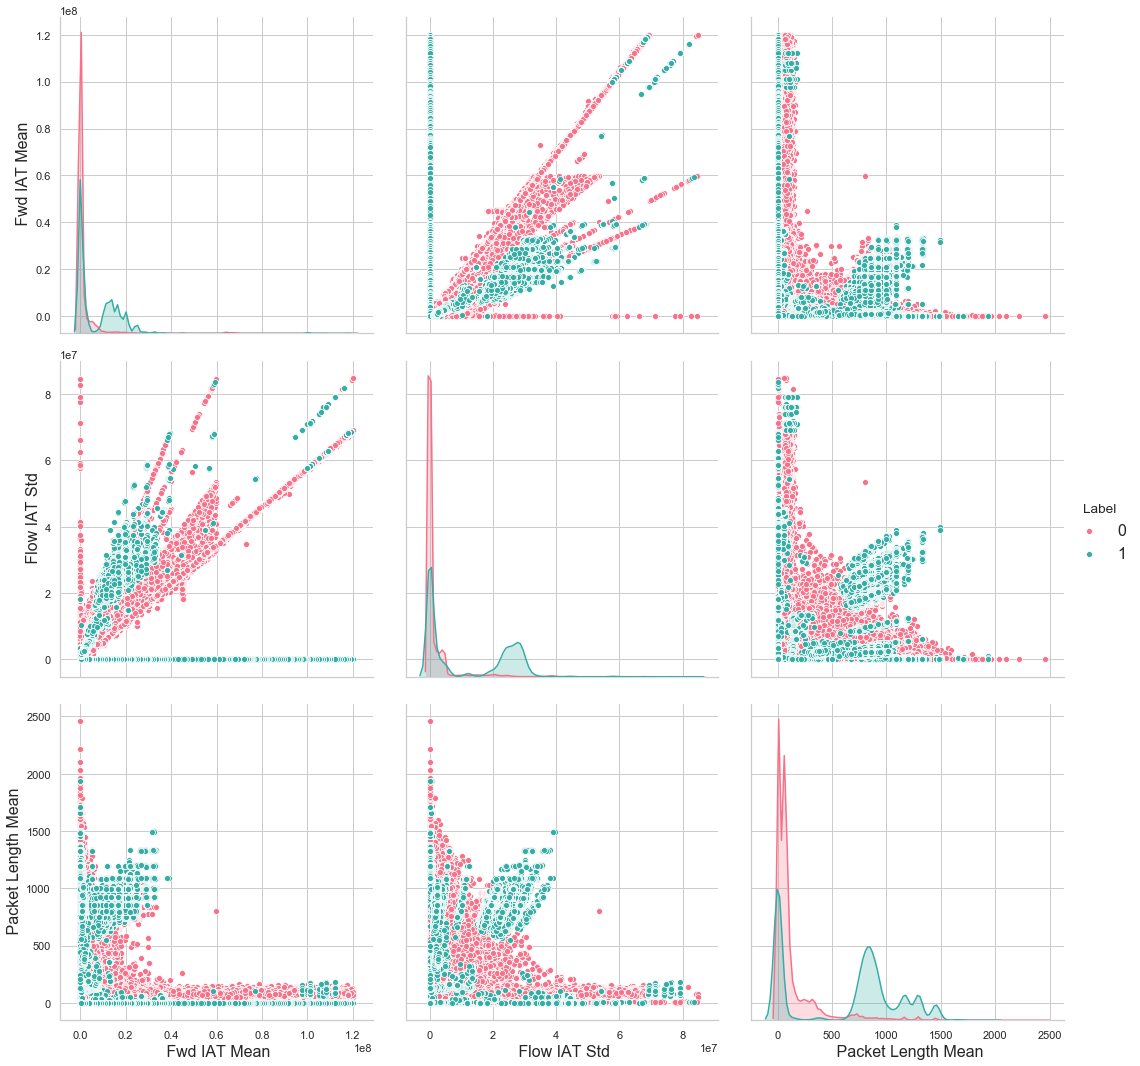

In [38]:
sns.set(rc=rc)
sns.set_style("whitegrid")
sns.pairplot(data, height=3, hue = "Label", palette="husl",vars = [' Fwd IAT Mean', ' Flow IAT Std', ' Packet Length Mean'], size = 5)
plt.show()

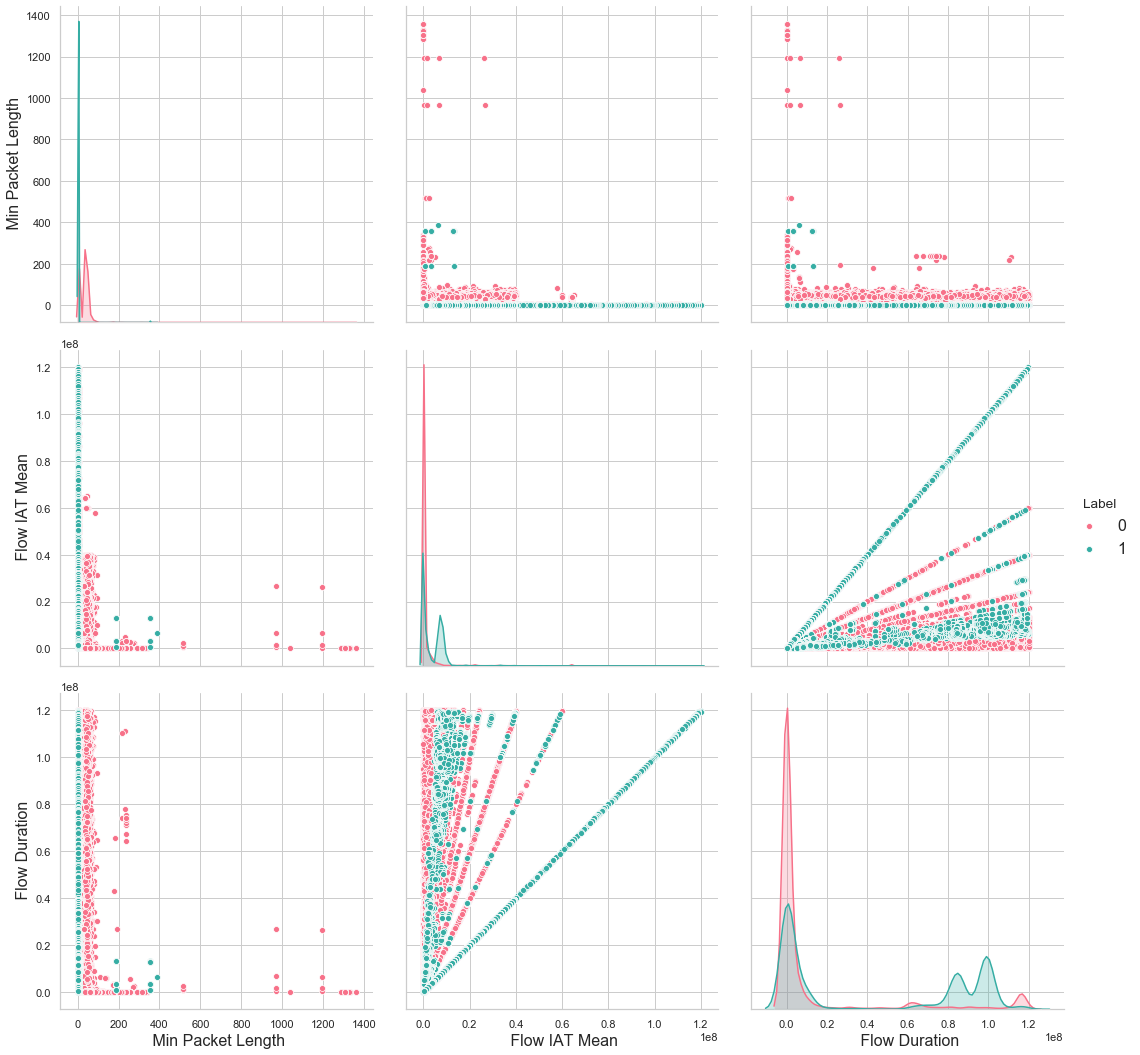

In [39]:
sns.set(rc=rc)
sns.set_style("whitegrid")
sns.pairplot(data, height=3, hue = "Label", palette="husl", vars = [' Min Packet Length', ' Flow IAT Mean', ' Flow Duration'], size = 5)
plt.show()

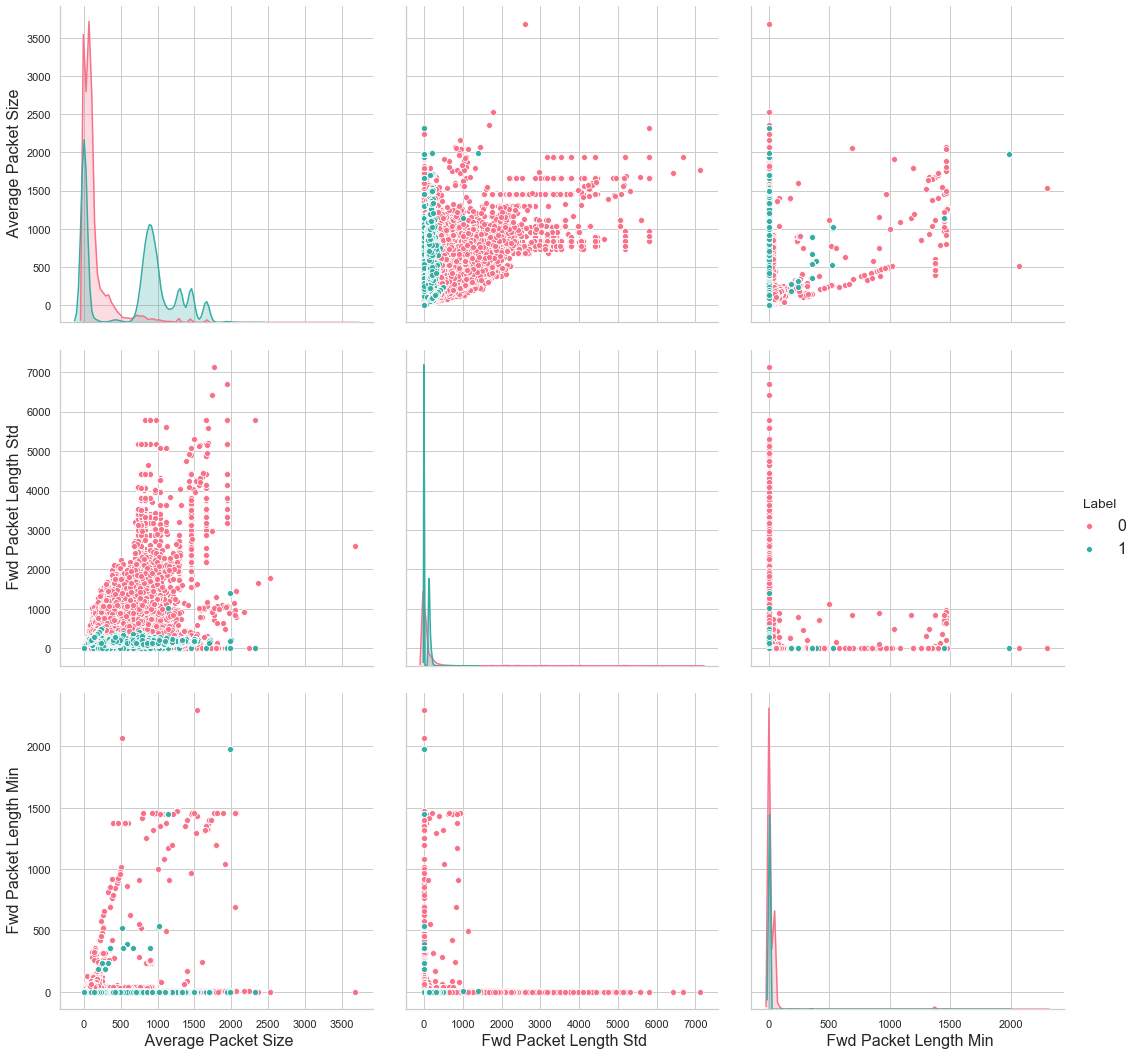

In [40]:
sns.set(rc=rc)
sns.set_style("whitegrid")
sns.pairplot(data, height=3, hue = "Label", palette="husl", vars = [' Average Packet Size', ' Fwd Packet Length Std',' Fwd Packet Length Min'], size = 5)
plt.show()

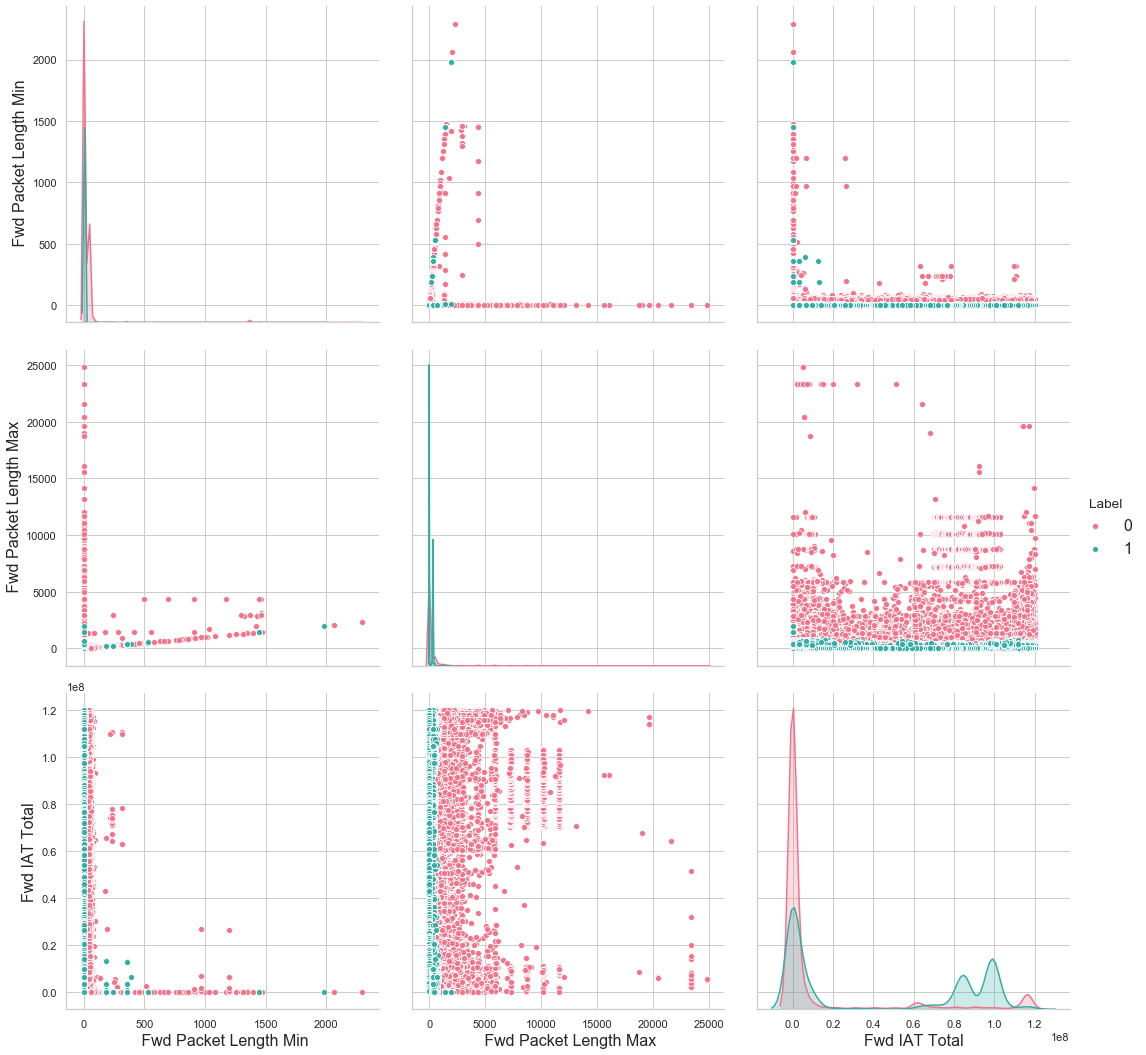

In [41]:
sns.set(rc=rc)
sns.set_style("whitegrid")
sns.pairplot(data, height=3, hue = "Label", palette="husl", vars = [' Fwd Packet Length Min', ' Fwd Packet Length Max', 'Fwd IAT Total'], size = 5)
plt.show()

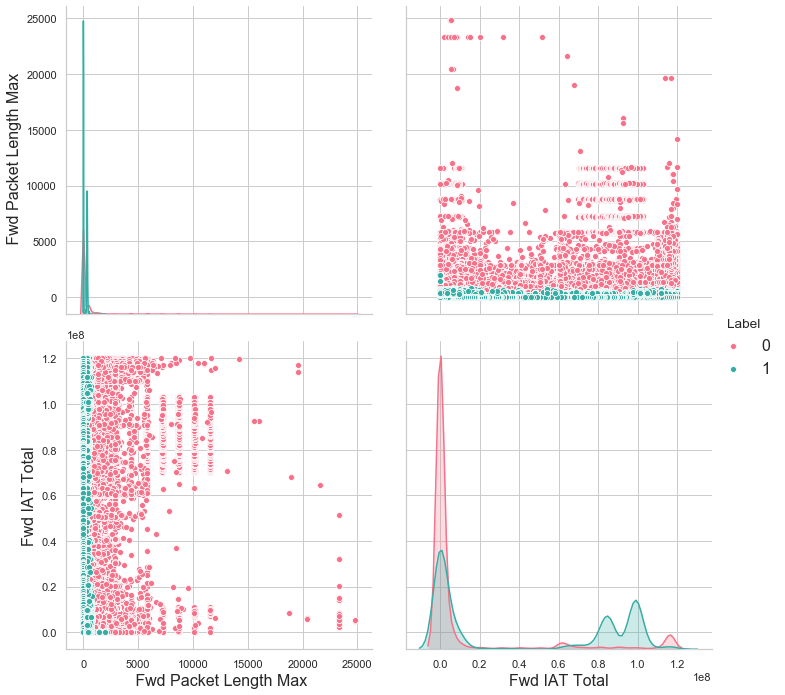

In [42]:
sns.set(rc=rc)
sns.set_style("whitegrid")
sns.pairplot(data, height=3, hue = "Label", palette="husl", vars = [' Fwd Packet Length Max', 'Fwd IAT Total'], size = 5)
plt.show()

In [ ]:
#By getting a high level overview of plots from pair plot, we can see which two features can well explain/separate the data and then we can use scatter plot between those 2 features to explore further. From the above plot we can conclude like, Fwd Packet Len Min, Average packet size,Min Pkt len, Pkt len Mean, are the features which can separate the data to some extent.

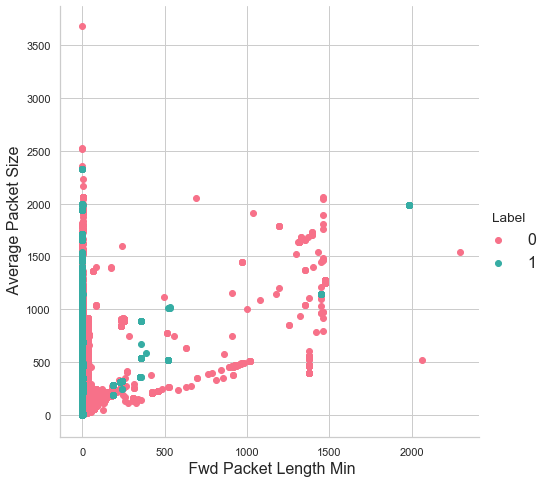

In [93]:
#Plot between Fwd Pkt len Min and Avg Pkt size
sns.set(rc=rc)
sns.set_style("whitegrid")
sns.FacetGrid(data, height=5, hue = "Label", palette="husl", size=7) \
   .map(plt.scatter, " Fwd Packet Length Min", " Average Packet Size") \
   .add_legend()
plt.show()

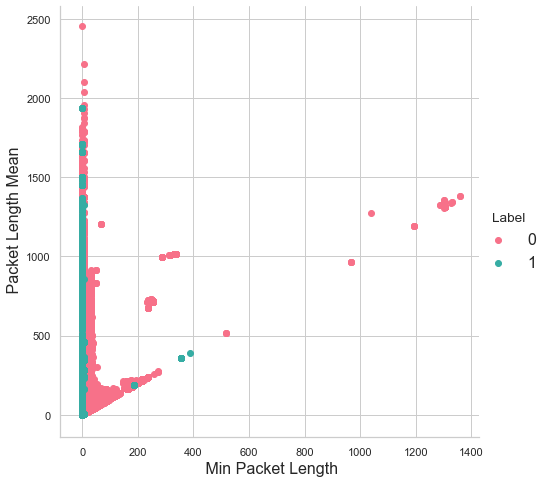

In [94]:
#Plot between Min Packet Length and  Packet Length Mean
sns.set(rc=rc)
sns.set_style("whitegrid")
sns.FacetGrid(data, height=5, hue = "Label", palette="husl", size=7) \
   .map(plt.scatter, " Min Packet Length", " Packet Length Mean") \
   .add_legend()
plt.show()

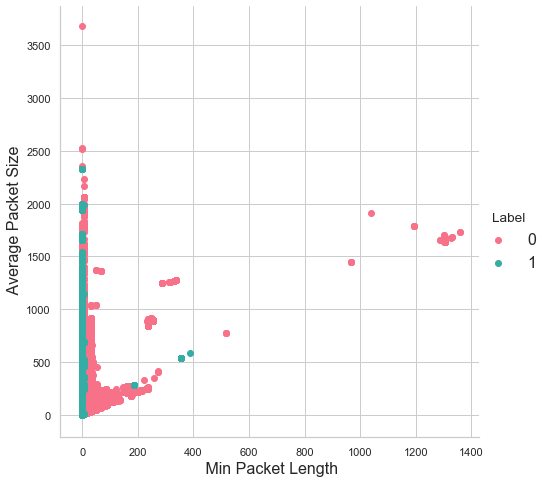

In [95]:
#Plot between Min Packet Length and  Average Packet Size
sns.set(rc=rc)
sns.set_style("whitegrid")
sns.FacetGrid(data, height=5, hue = "Label", palette="husl", size=7) \
   .map(plt.scatter, " Min Packet Length", " Average Packet Size") \
   .add_legend()
plt.show()

In [112]:
#####Pearson correlation###############

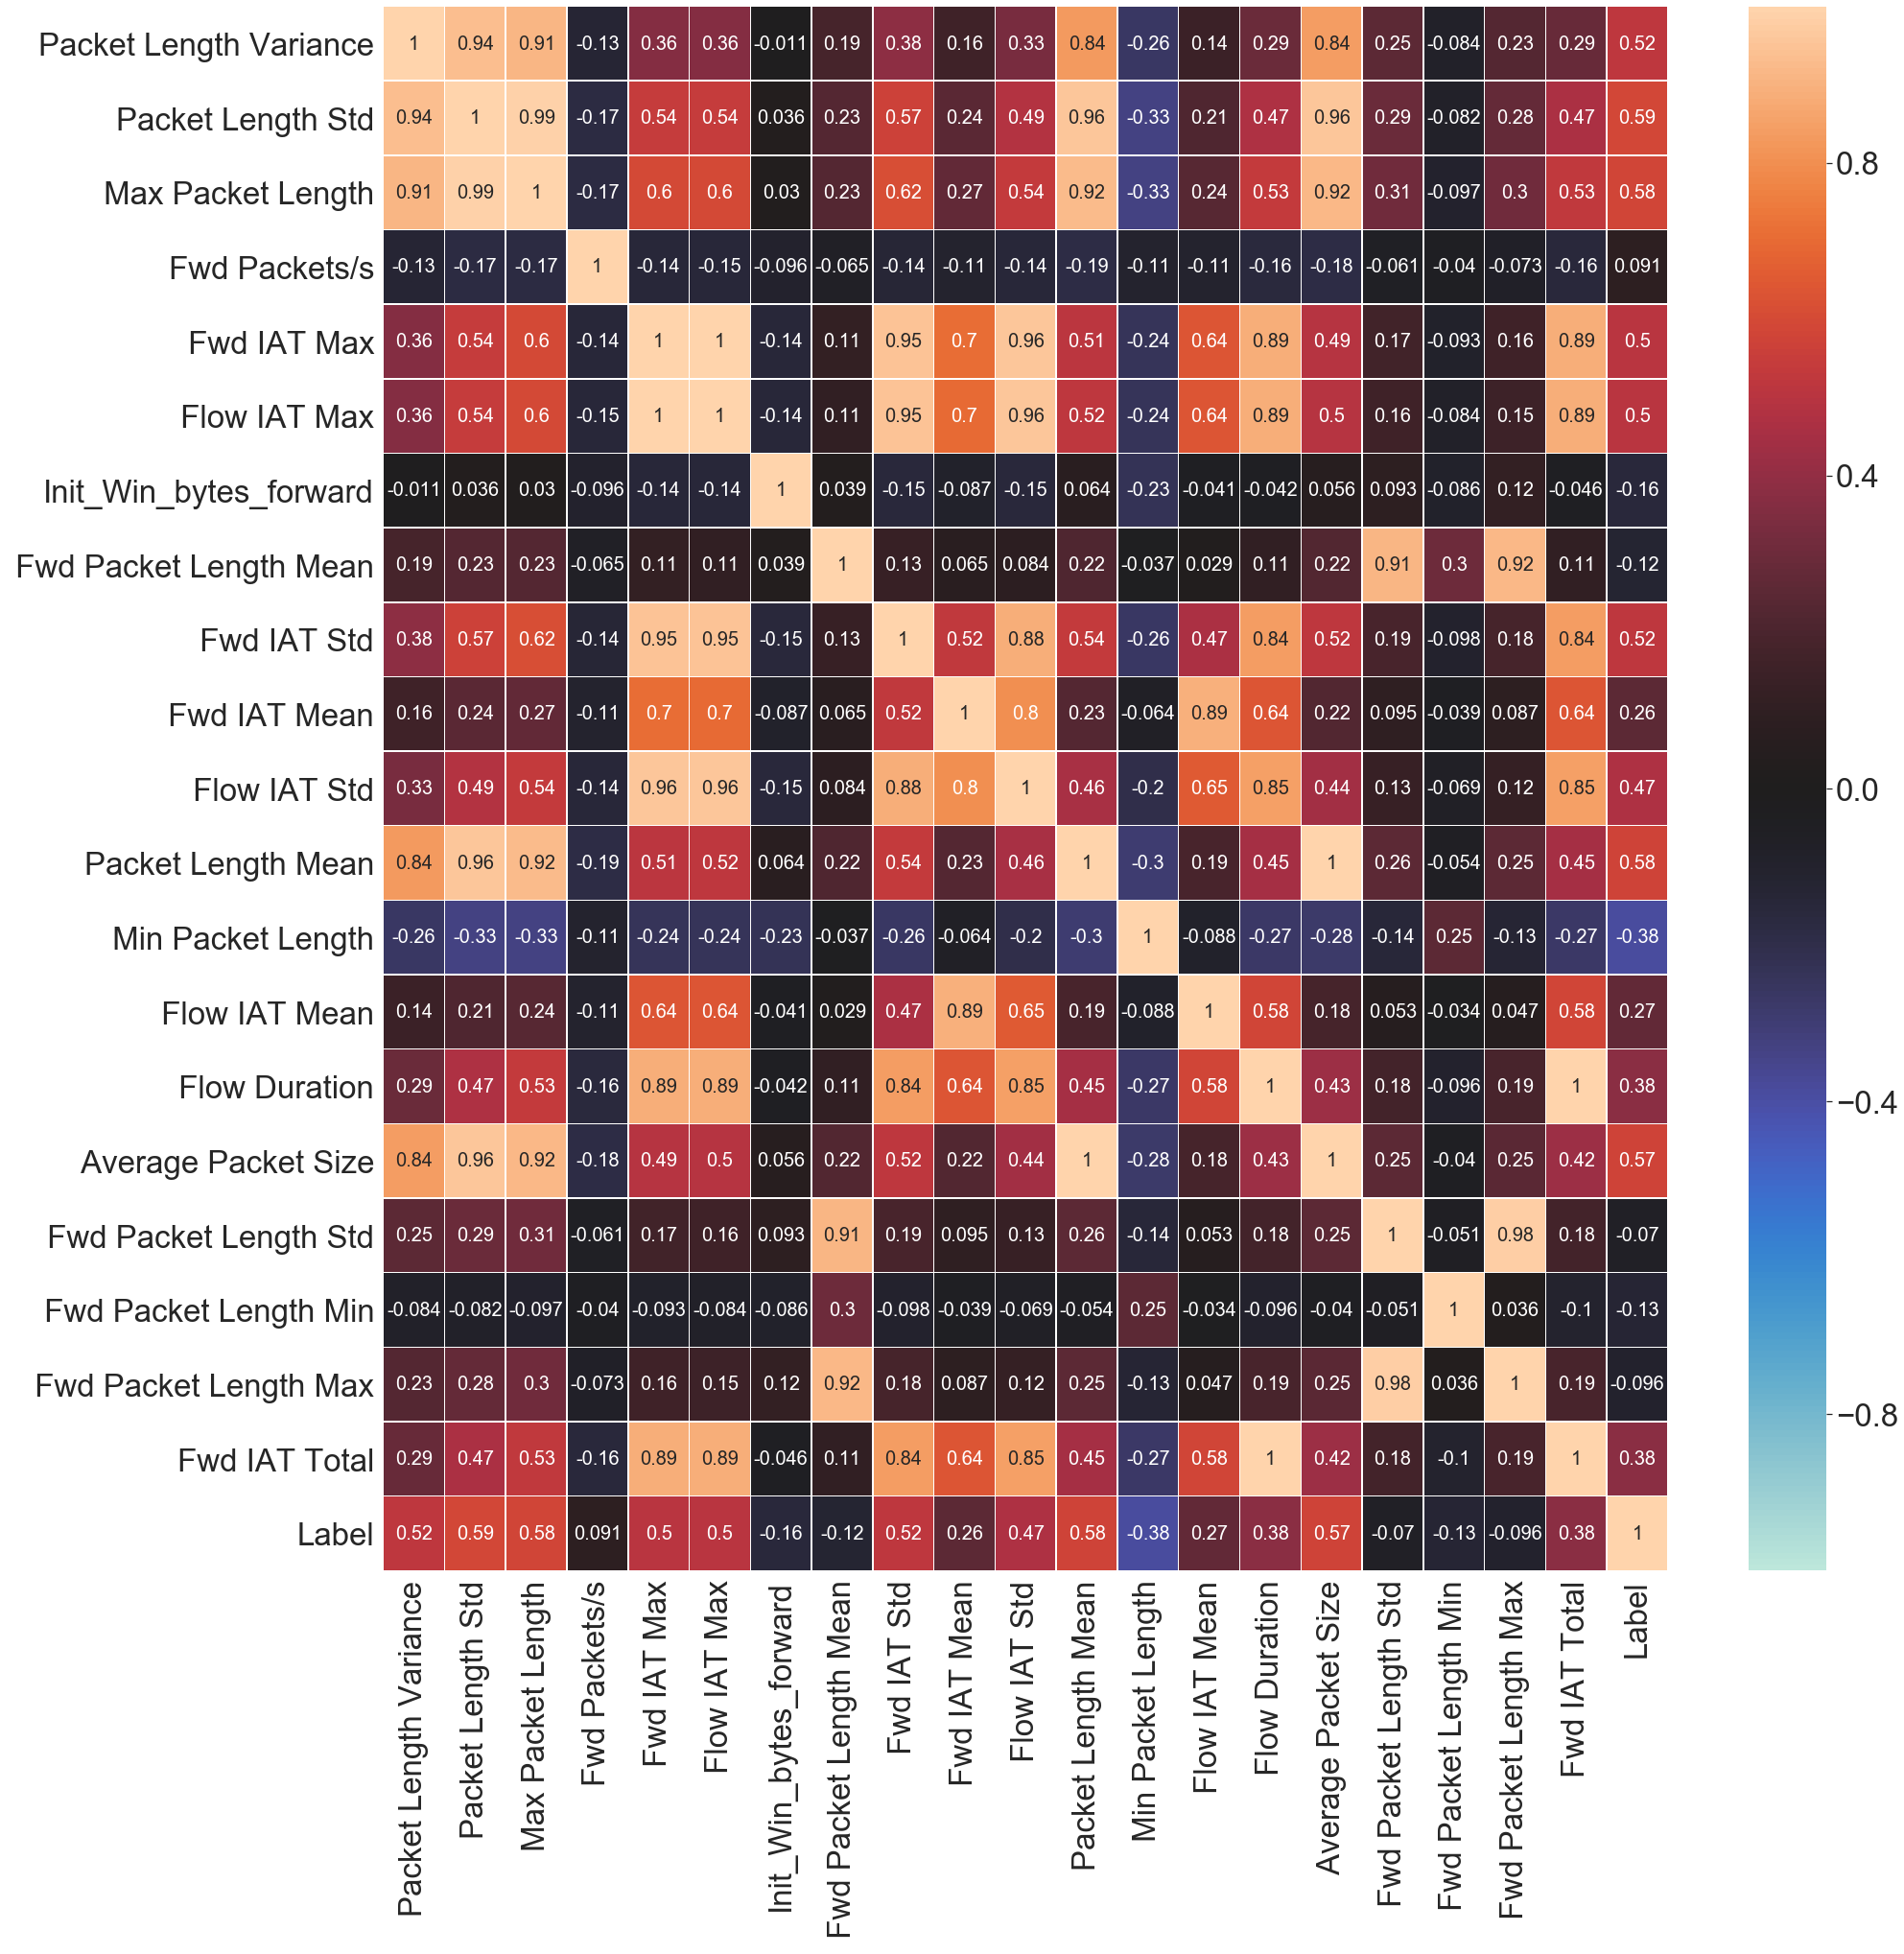

In [111]:
sns.set(font_scale=3.0)
plt.figure(figsize=(30,30))
correlation = data.corr()
g=sns.heatmap(correlation, annot=True, vmin=-1,center=0, vmax=1, linewidths=.5,annot_kws={"size": 20})
plt.show()

In [113]:
corr_target=abs(correlation["Label"])
rel_features=corr_target[corr_target>0.50]
rel_features

 Packet Length Variance    0.518881
 Packet Length Std         0.592035
 Max Packet Length         0.581573
 Fwd IAT Max               0.503244
 Flow IAT Max              0.504205
 Fwd IAT Std               0.518858
 Packet Length Mean        0.577119
 Average Packet Size       0.572942
Label                      1.000000
Name: Label, dtype: float64

In [ ]:
###after this manually select features that are not correlated from Pearson correlation results from the matrix##

In [6]:
print(data[[" Packet Length Variance"," Packet Length Std"]].corr())
print(data[[" Packet Length Variance"," Max Packet Length"]].corr())
print(data[[" Packet Length Variance"," Fwd IAT Max"]].corr())
print(data[[" Packet Length Variance"," Flow IAT Max"]].corr())
print(data[[" Packet Length Variance"," Packet Length Mean"]].corr())
print(data[[" Packet Length Variance"," Average Packet Size"]].corr())


                          Packet Length Variance   Packet Length Std
 Packet Length Variance                 1.000000            0.936047
 Packet Length Std                      0.936047            1.000000
                          Packet Length Variance   Max Packet Length
 Packet Length Variance                 1.000000            0.910716
 Max Packet Length                      0.910716            1.000000
                          Packet Length Variance   Fwd IAT Max
 Packet Length Variance                 1.000000      0.362588
 Fwd IAT Max                            0.362588      1.000000
                          Packet Length Variance   Flow IAT Max
 Packet Length Variance                 1.000000       0.363435
 Flow IAT Max                           0.363435       1.000000
                          Packet Length Variance   Packet Length Mean
 Packet Length Variance                 1.000000             0.835252
 Packet Length Mean                     0.835252             1.00

In [7]:
print(data[[" Packet Length Std"," Max Packet Length" ]].corr())
print(data[[" Packet Length Std"," Fwd IAT Max" ]].corr())
print(data[[" Packet Length Std"," Flow IAT Max" ]].corr())
print(data[[" Packet Length Std"," Packet Length Mean" ]].corr())
print(data[[" Packet Length Std", " Average Packet Size"]].corr())


                     Packet Length Std   Max Packet Length
 Packet Length Std            1.000000            0.985644
 Max Packet Length            0.985644            1.000000
                     Packet Length Std   Fwd IAT Max
 Packet Length Std            1.000000      0.542039
 Fwd IAT Max                  0.542039      1.000000
                     Packet Length Std   Flow IAT Max
 Packet Length Std            1.000000       0.543355
 Flow IAT Max                 0.543355       1.000000
                      Packet Length Std   Packet Length Mean
 Packet Length Std             1.000000             0.955799
 Packet Length Mean            0.955799             1.000000
                       Packet Length Std   Average Packet Size
 Packet Length Std              1.000000              0.955264
 Average Packet Size            0.955264              1.000000


In [9]:
print(data[[" Max Packet Length"," Fwd IAT Max" ]].corr())
print(data[[" Max Packet Length"," Flow IAT Max"]].corr())
print(data[[" Max Packet Length"," Packet Length Mean" ]].corr())
print(data[[" Max Packet Length"," Average Packet Size" ]].corr())


                     Max Packet Length   Fwd IAT Max
 Max Packet Length            1.000000      0.596563
 Fwd IAT Max                  0.596563      1.000000
                     Max Packet Length   Flow IAT Max
 Max Packet Length            1.000000       0.597212
 Flow IAT Max                 0.597212       1.000000
                      Max Packet Length   Packet Length Mean
 Max Packet Length             1.000000             0.923738
 Packet Length Mean            0.923738             1.000000
                       Max Packet Length   Average Packet Size
 Max Packet Length              1.000000              0.919113
 Average Packet Size            0.919113              1.000000


In [10]:
print(data[[" Fwd IAT Max"," Flow IAT Max"]].corr())
print(data[[" Fwd IAT Max"," Packet Length Mean" ]].corr())
print(data[[" Fwd IAT Max", " Average Packet Size"]].corr())

                Fwd IAT Max   Flow IAT Max
 Fwd IAT Max       1.000000       0.998618
 Flow IAT Max      0.998618       1.000000
                      Fwd IAT Max   Packet Length Mean
 Fwd IAT Max             1.000000             0.513771
 Packet Length Mean      0.513771             1.000000
                       Fwd IAT Max   Average Packet Size
 Fwd IAT Max              1.000000              0.494182
 Average Packet Size      0.494182              1.000000


In [11]:
print(data[[" Flow IAT Max"," Packet Length Mean" ]].corr())
print(data[[" Flow IAT Max", " Average Packet Size"]].corr())

                      Flow IAT Max   Packet Length Mean
 Flow IAT Max             1.000000             0.516108
 Packet Length Mean       0.516108             1.000000
                       Flow IAT Max   Average Packet Size
 Flow IAT Max              1.000000              0.496495
 Average Packet Size       0.496495              1.000000


In [12]:
print(data[[" Packet Length Mean", " Average Packet Size"]].corr())

                       Packet Length Mean   Average Packet Size
 Packet Length Mean              1.000000              0.998742
 Average Packet Size             0.998742              1.000000


In [ ]:
#Packet Length Std
#Max Packet Length
#flow IAT Max
#3 important less correlated features
